# RAPPORT: ZOMBIE-APOKALYPSE
*Julius Skavnes*

## INTRODUKSJON

I dette prosjektet skal jeg modellere en zombieapokalypse. Historien bak oppgaven er at 500 mennesker har søkt tilflukssted i byen Alexandria, Virginia, etter et zombie-utbrudd. Gjennom oppgaven skal jeg vise ulike resultater av hvordan populasjonen til menneskene og zombiene kan bli påvirket av ulike faktorer.


## TEORI

Koden i dette prosjektet fokuserer mest på Eulers metode. Den går ut på å finne funksjonsverdiene til en ukent funksjon ved neste tidssteg ut fra den deriverte av funksjonen. Eulers metode finner man ved å omgjøre Newtons kvotient, som igjen kommer fra definisjonen av den deriverte, og kan utledes slik:

Bruker definisjonen av den deriverte:

![Defavder](https://i.gyazo.com/226ab64967817b48c37d400d6653bc7f.png)

Bytter ut Δx med h. Δx er tilnærmet lik 0, men for at det skal være mulig å programmere med en slik metode bruker vi h som er en veldig liten verdi. Dette gjør at svaret ikke blir helt nøyaktig, men forskjellene er så små at vi ikke ser noen særlig endring i resultatet.

![Newtonskvotient](https://i.gyazo.com/51ff2c0c82fe4caecb7980e1adccd659.png)

Omgjør likningen slik at vi finner f(x+h), som representerer verdien for neste tidssteg.

![rareuler](https://i.gyazo.com/5c795f0a2cc5bf67293a217bd0c7d8e2.png)

Bytter ut x med f(t_k) som representerer hvert tidssteg:

![Eulersmetode](https://i.gyazo.com/8aa027f28a6abb1bf46dfc153c22ee21.png)

Da har vi utledet Eulers metode. Dette er hovedteorien bak koden og det meste andre er bare små tillegg som endrer ulike verdier. Dette er en fin metode som hjelper veldig når man skal modellere slike situasjoner som den i oppgaven.

### Modell 1

I denne modellen brukte jeg en linær sammenheng for å modellere vekstfarten til menneskene:

![dadawwda](https://i.gyazo.com/83c9f63161d2b549ae4c399400f2c070.png)

Her er P'(t) vekstfarten av antall mennesker (p) ved tiden (t) i år, der reproduksjonsraten (a) til menneskene forteller hvor mange mennesker som fødes hvert år av hvert menneske. Konstanten iv viser til en konstant innvandring som ikke er avhengig av populasjonen.

### Modell 2

I denne modellen legger jeg til en bæreevne slik at det blir en logistisk vekst. Uten denne får menneskene en eksponensiell vekst til det uendelige. Den legges til slik:

![dwadwadwdwadwa](https://i.gyazo.com/5017e64be88f80e249233d1834acf560.png)

Her er bæreevnen (b) en konstant som forteller hva den største populasjonen menneskene kan ha er. 

### Modell 3

I denne modellen legger jeg til en dødsrate for menneskene. Den brukes med tanke på død av sykdom, sult, skade og alderdom. Den legges til slik:

![dwadawwdwdadwadw](https://i.gyazo.com/6ca1c24eb85e81e8b72aee54761b3c11.png)

Her er dødsraten (dr) en konstant som forteller hvor stor del av populasjonen som dør hvert år.

### Modell 4

Her legger jeg til zombier (z) som har mulighet til å drepe menneskene. Antall zombier er konstante selv om de er en funksjon av tidssteget.

![dhawdwadwdadawadw](https://i.gyazo.com/de96603fea003830c27b77038b511a05.png)

Her er møteraten (m) en konstant som forteller hvor ofte menneskene og zombiene møtes (der mennesket dør). 

### Modell 5

I denne modellen legger jeg til en egen vekstrate for zombiene. Når mennesker blir smittet blir de til zombier, derfor trenger zombiene en egen vekstrate.

![dhwoadwawda](https://i.gyazo.com/091fed11cfbcd80ce244511528237a29.png)

Her er smitteraten (sr) en konstant som er halvparten av møteraten, som gjør at halvparten av menneskene som dør av zombier blir smittet og gjort om til zombier.

### Modell 6

I denne modellen legger jeg til muligheten for at mennesker kan drepe zombiene.

![dahuwdwadwadwa](https://i.gyazo.com/c8afd27a02f9633085636fa353ef1885.png)

Her er zombie-dødsraten (zdr) en konstant som er 1/3 av møteraten (m) og forteller hvor ofte zombiene dør når de møter mennesker.

### Modell 7

I denne modellen legger jeg til muligheten for at menneskene kan få tilsendt forsterkninger fra byene Hilltop og Kingdom. Dette kan sees bedre i resultat- og drøftedelen av rapporten.

### Modell 8

I denne modellen legger jeg til muligheten for at mennesker utvikler en bedre evne til å forsvare seg over tid. Dette kan sees bedre i resultat- og drøftedelen av rapporten.

## Beskrivelse og Resultater

### Modell 1

Begynner med å lage et enkelt program for å modellere menneskepopulasjonen med en veksrate (a) som inneholder fødsler og legger til en konstant innvandring (iv), bruker Eulers metode:

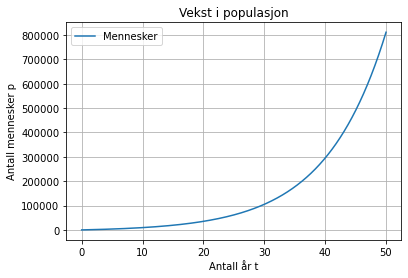

In [391]:
from pylab import * 

# Legger inn initialbetingelser
p0 = 500     # Antall mennesker ved start
t0 = 0       # Setter starttid til 0
a = 0.1       # Stigningstallet til menneskene med tanke på fødsler hvert år
iv = 500        # iv = innvandring, tenker at det kommer konstant 500 personer inn hvert år

# Legger inn tidssteget dt sammen med antall år og tidsintervaller
År = 50
N = 100000
dt = År/N        # Dette er h i Eulers metode, deler antall år på et stort tall N for å få små tidssteg

# Lager matriser 
t = zeros(N)
p = zeros(N)
pder = zeros(N)

# Legger inn startverdien i hver matrise, trenger ikke å legge inn for pder fordi man skal ikke finne verdien ved neste tidssteg for den deriverte i Eulers metode
t[0] = t0
p[0] = p0

# Bruker eulers metode 
for i in range(N-1):
    pder[i] = a*p[i] + iv          # Stigningstallet til menneskene, her med tanke på fødsler og innvandring
    p[i+1] = p[i] + pder[i]*dt         # Summerer nåværende verdi for p med stigningstallet for å få neste verdi
    t[i+1] = t[i] + dt               # Legger til dt for neste tidssteg

# Plotter graf med populasjonen
plot(t, p, label="Mennesker")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p")
grid()
legend()
show()

### Modell 2

Legger til en bæreevne (b) for menneskepopulasjonen:

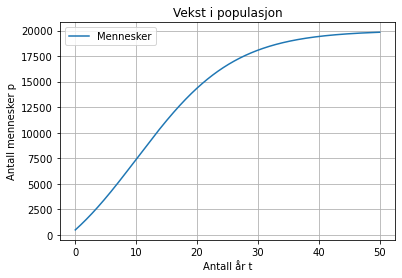

In [392]:
b = 20000    # Bæreevnen til menneskene

# Bruker eulers metode
for i in range(N-1):
    pder[i] = (a*p[i] + iv)*(1 - p[i]/b)   # Ganger det inne med vekstfarten slik at det ganges med 0 når grensen er nådd, og da blir det ingen vekst
    p[i+1] = p[i] + pder[i]*dt   
    t[i+1] = t[i] + dt

# Plotter graf med populasjonen 
plot(t, p, label="Mennesker")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p")
grid()
legend()
show()

### Modell 3

Legger til en dødsrate (dr) som er en samlet verdi for død ved skade, sult, sykdom og alderdom:

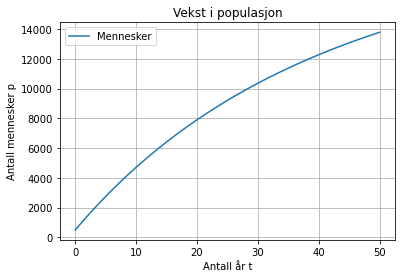

In [393]:
dr = 0.105   # Dødsraten til menneskene

# Bruker eulers metode
for i in range(N-1):
    pder[i] = (a*p[i] + iv - dr*p[i])*(1 - p[i]/b)    # Legger inn dødsraten i vekstfarten
    p[i+1] = p[i] + pder[i]*dt 
    t[i+1] = t[i] + dt

# Plotter graf med populasjonen
plot(t, p, label="Mennesker")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p")
grid()
legend()
show()

### Modell 4

Legger til Zombier (z) og en møterate (m) som bestemmer møteraten mellom mennesker og zombier. Når de møtes vil menneskene dø, og antall personer som dør er avhengig av populasjonen til zombiene og menneskene.

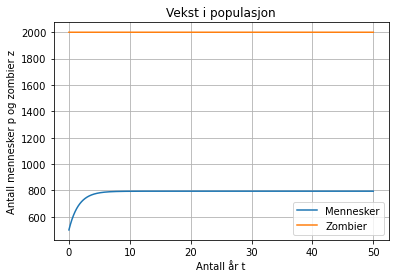

In [394]:
z0 = 2000       # Zombier ved t = 0, altså på starten
m =  0.0003        # Møteraten mellom mennesker og zombier

# Lager matrise for zombiene
z = zeros(N) 

# Legger inn startverdien i matrisen
z[0] = z0

# Bruker eulers metode
for i in range(N-1):
    pder[i] = (a*p[i] + iv - dr*p[i])*(1 - p[i]/b) - m*p[i]*z[i]      # Legger inn møteraten i stigningstallet 
    p[i + 1] = p[i] + pder[i]*dt 
    t[i + 1] = t[i] + dt
    z[i + 1] = z[i]       # Legger til at populasjonen til zombiene er lik for hvert tidssteg

# Plotter graf med populasjonen
plot(t, p, label="Mennesker")
plot(t, z, label="Zombier")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p og zombier z")
grid()
legend()
show()

### Modell 5

Legger til en smitterate som gjør at noen av menneskene som møter zombier, ikke dør, men blir til zombier:

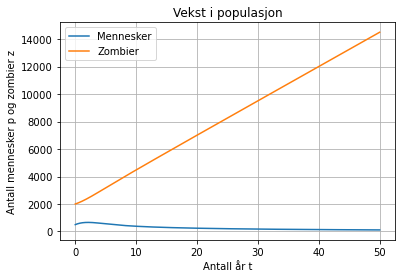

In [395]:
sr = m*0.5 # Smitteraten, halvparten av de som møter zombiene blir smitta

# Lager matrise for vekstfarten til zombiene
zder = zeros(N)

# Bruker eulers metode
for i in range(N-1):
    pder[i] = (a*p[i] + iv - dr*p[i])*(1 - p[i]/b) - m*p[i]*z[i]
    zder[i] = sr*p[i]*z[i]          # Legger inn smitteraten slik at halvparten av de som dør ved hvert tidssteg blir addert til populasjonen til zombiene
    p[i + 1] = p[i] + pder[i]*dt 
    t[i + 1] = t[i] + dt
    z[i + 1] = z[i] + zder[i]*dt        # Legger til vekstfarten

# Plotter graf med populasjonen
plot(t, p, label="Mennesker")
plot(t, z, label="Zombier")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p og zombier z")
grid()
legend()
show()

### Modell 6

Legger til muligheten at mennesker kan ta liv av zombier ved bruk av zombie-dødsraten (zdr):

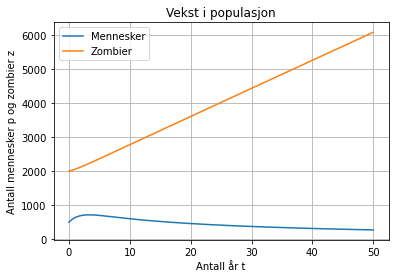

In [396]:
zdr = m/3      # Legger til en ny konstant som er antall zombier som dør når de møter mennesker

# Bruker eulers metode
for i in range(N-1):
    pder[i] = (a*p[i] + iv - dr*p[i])*(1 - p[i]/b) - m*p[i]*z[i] 
    zder[i] = sr*p[i]*z[i] - zdr*p[i]*z[i]       # Legger zdr til i vekstfarten slik at populasjonen til zombiene blir riktig
    p[i + 1] = p[i] + pder[i]*dt 
    t[i + 1] = t[i] + dt
    z[i + 1] = z[i] + zder[i]*dt

# Plotter graf med populasjonen
plot(t, p, label="Mennesker")
plot(t, z, label="Zombier")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p og zombier z")
grid()
legend()
show()

### Modell 7

Legger til muligheten for forsterkninger fra andre byrer når populasjonen til menneskene blir for lav. Forsterkningene tar med bedre medisiner og nye våpen som vil hjelpe menneskene mot zombiene:

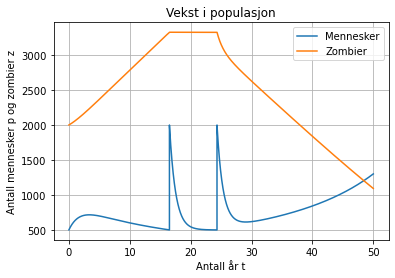

In [397]:
# Gjenoppretter riktige verdier til konstantene
zdr = m/3      
zdr2 = zdr*0.5    # Legger til en ny konstant som hjelper med å holde utregningen ryddig, skal holde det adderte zdr under forsterkningene konstant
dr = 0.105

# Bruker eulers metode
for i in range(N-1):
    if p[i] > 499:           # Hvis populasjonen til menneskene er over 499, skjer ingenting
        pder[i] = (a*p[i] + iv - dr*p[i])*(1 - p[i]/b) - m*p[i]*z[i] 
        zder[i] = sr*p[i]*z[i] - zdr*p[i]*z[i]
        p[i + 1] = p[i] + pder[i]*dt 
        t[i + 1] = t[i] + dt
        z[i + 1] = z[i] + zder[i]*dt
    else:                    # Når populasjonen faller under 499 kommer forsterkningene
        p[i+1] = p[i] + 1500            # Legger til 1500 mennesker til populasjonen, som er mennesker fra andre byer som kommer for å hjelpe
        t[i + 1] = t[i] + dt
        z[i + 1] = z[i]
        dr = 0.08          # Forsterkningene bringer bedre medisin som senker dødsraten til menneskene betraktelig
        zdr += zdr2         # Gjør at zombie-dødsraten blir 50% større ettersom menneskene får tilgang på bedre våpen fra forsterkningene, her må jeg bruke en annen konstant for å forhindre eksponensiell vekst av zdr ved flere tilfeller av forsterkninger
    
# Plotter graf med populasjonen  
plot(t, p, label="Mennesker")
plot(t, z, label="Zombier")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p og zombier z")
grid()
legend()
show()

### Modell 8

Legger til at menneskene utvikler en bedre evne til å forsvare seg selv etterhvert som tiden går, som gjør at flere zombier dør:

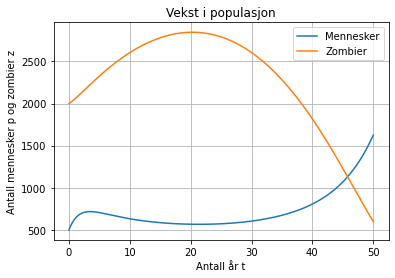

In [398]:
# Gjenoppretter riktige verdier til konstanter
zdr = m/3
dr = 0.105

# Bruker eulers metode
for i in range(N-1):
    if p[i] > 499:
        pder[i] = (a*p[i] + iv - dr*p[i])*(1 - p[i]/b) - m*p[i]*z[i] 
        zder[i] = sr*p[i]*z[i] - zdr*z[i]*p[i]
        p[i + 1] = p[i] + pder[i]*dt 
        t[i + 1] = t[i] + dt
        z[i + 1] = z[i] + zder[i]*dt
        zdr = zdr*(1+1/N)              # Gjør at zdr blir litt større for hvert tidssteg som representerer utviklingen til menneskene
    else:
        p[i+1] = p[i] + 1500
        t[i + 1] = t[i] + dt
        z[i + 1] = z[i]
        dr = 0.08
        zdr += zdr2
    
# Plotter graf med populasjonen
plot(t, p, label="Mennesker")
plot(t, z, label="Zombier")
title("Vekst i populasjon")
xlabel("Antall år t")
ylabel("Antall mennesker p og zombier z")
grid()
legend()
show()

## Drøfting 
## Drøfting: Drøft de ulike modellene. Begrensninger, forutsetninger, antakelser, konsekvenser. Hva betyr endring av de ulike parametrene?

### Modell 1

Det første resultatet vi får er en eksponensiell graf for populasjonen til menneskene. Dette er en veldig lite realistisk modell. Her antas det at menneskene har evig tilgang til plass og nødvendige ressurser, og at ingen dør. Det er mye modellen ikke tar hensyn til som f.eks. dødsfall. Bruken av modellen begrenses veldig med tanke på hvor få faktorer den tar hensyn til, og kan ikke brukes til noe særlig annet enn å se hvordan mennesker hadde utviklet seg med evig ressurser og plass med enn viss fødselsrate og innvandring. 

### Modell 2

Den andre modellen gir et mer realistisk resultat enn den første. Her bruker vi bæreevne som begrenser populasjon til menneskene men hensyn på plass og nødvendige ressurser. Når det blir for mange mennesker blir det ikke nok av dette til alle slik at muligheten for eksponensiell vekst fjernes. Selv om denne modellen er mer realistisk enn den første har den også mangler. Den tar heller ikke hensyn til dødsfall, som er viktig for å få en riktig modellering av menneskelig populasjon. Dette skal også være en modell for en zombieapokalypse, så her antas det at mennesker og zombier ikke har noen interaksjoner med hverandre.

### Modell 3

Den tredje modellen legger til en dødsrate. Det er en liten endring, men hjelper veldig med å gi et realistisk resultat. Nå fungerer modellen som en fin måte i vise veksten til en populasjon i et bestemt område ved at den tar hensyn til fødsler, død, innvandring og bæreevne. Dødsraten i denne modellen er høyere enn fødselsraten. Grunnen til dette er at modellen er satt i en zombieapokalypse. Her har man lite tilgang til medisin, og mat vil være vanskeligere å få tak i enn før. Dødsraten tar hensyn til både sykdom, alderdom, skade og sult. Selv om dødsraten er større enn fødselsraten, er vekstraten fortsatt positiv pga. den konstante innvandringen. Dette gjør at denne modellen er en veldig realistisk fremvisning av et samfunn i en zombieapokalypse, men den har fortsatt mangler som f.eks. zombier.

### Modell 4

Den fjerde modellen legger til zombier som en konstant populasjon. Dette er en god start på vei mot en realistisk apokalypse-modell, men den har mange feil. Den antar at zombines populasjon er 2000 uten endringer, og at mennesker har ingen måte å slå tilbake mot zombiene. Resultatet blir at populasjonen til menneskene går mot en bestemt verdi der stigningstallet til menneskene blir 0. Ved denne verdien vil det ikke lenger være en økning og populasjonen til menneskene vil være tilnærmet konstant. Dette er en helt ok modell, men man ønsker seg gjerne en bedre modell for å representere en zombieapokalypse.

### Modell 5

Den femte modellen legger til en viktig faktor av en zombieapokalypse, nemlig smitteraten. En zombieapokalypse som flesteparten av oss kjenner det som definers av at mennesker blir til zombier hvis de blir bitt/dør. I denne modellen antar vi at ca. halvparten av de som møter på (dør) av en zombie blir smittet, mens resten dør. Dette skaper et mer realistisk scenario enn tidligere modeller. Nå vil zombiepopulasjonen vokse, isteden for å være konstant. Modellen har fortsatt mangler, som f.eks. at den ikke tar hensyn til at mennesker kan forsvare seg selv.

Resultatet viser en stor vekst for zombiene, mens menneskene sakte men sikkert forsvinner. Selv om resultatet ser ekstremt ut er det forventet med tanke på feilene modellen har. Når det er bare zombiene som kan drepe menneskene samtidig som de vokser i størrelse vil ikke menneskene ha en særlig god sjanse for å overleve.

### Modell 6

Den sjette modellen legger til menneskers mulighet til å forsvare seg. Denne faktoren er med på å styrke realismen til modellen enda et steg. Modellen har fortsatt mange mangler, men de store manglene er nå tettet. Nå viser modellen en ordentlig zombieapokalypse der mange ulike faktorer er tatt hensyn til. Denne modellen antar at menneskene ikke er særlig gode til å forsvare seg selv. Sannsynligheten for at mennesker dør av zombier er større enn at zombier dør av mennesker. Dette gjør at menneskene fortsatt kommer til å forsvinne sakte men sikkert, men nå vil det skje mye saktere enn i modell fem. 

Resultatet viser at zombiene har blitt mye færre, men populasjonen til menneskene fortsetter å synke. Dette gir mening med tanke på den høye dødsraten menneskene har sammen med den høye møteraten med zombiene. Selv om resultatet ikke er det man ville håpet på, er det som forventet. 

### Modell 7

Den syvende modellen legger til en faktor som er med på å knytte modellen til omgivelsene. Ved å gjøre det mulig at opulasjonen kan få forsterkninger går modellen utenfor det lille området det var begrenset til før. Her må vi ha mange antakelser. Den første er at det finnes byer rundt som alltid har mulighet til å sende forsterkninger. Den andre er at disse forsterkningene helt trygt kommer seg til Alexandria, og at de er villige til å dele utstyr og hjelpe dem bekjempe zombier. I en zombieapokalypse pleier mange å være veldig grådige, så det er kanskje litt optimistisk å anta at 1500 mennesker er villig til å kjempe til døden for de få menneskene som er igjen i Alexandria når den beste muligheten kanskje ville vært å overleve selv. Her må vi også anta at de har mulighet til å kontakte mennesker utenfor sin egen by, som kan være utfordrende i en zombieapokalypse.

Resultatet viser at den første delen av forsterkninger fra Hilltop hjalp med å stoppe veksten til zombiene ved å gi menneskene bedre tilgang til våpen, og ga menneskene en mindre dødsrate ved å gi dem medisiner, men flesteparten av forsterkningene døde fortsatt. Den andre mengden forsterkninger fra Kingdom hjalp veldig. Ved å gi zombiene en enda større dødsrate ved å komme med flere våpen gjorde dette at menneskene fikk en positiv vekstrate, mens antall zombier begynte å synke. Resultatet er positivt og forventet, og tillegget av forsterkninger var med på å gjøre modellen mer realistisk samtidig som det hjalp menneskene. 

### Modell 8

Den åttende og siste modellen legger til en viktig faktor, nemlig menneskenes utvikling. Modellen er over en periode på 50 år, og på den tiden vil menneskene lære mye om zombiene og hvordan man kan bekjempe dem. Dette tillegget gjorde modellen enda mer realistisk. Her må man også ha antakelser. Menneskene har stengt seg inne i Alexandria. For å klare å utvikle seg må de ha ressurser nok til å gjøre det. Etter mange år innestengt kan mange av disse ressursene ha blitt brukt opp/forsvunnet. 

Resultatet viser at på starten er modellen lik som tidligere modeller. Populasjonen til menneskene synker, mens det blir flere zombier. Men etterhvert klarer menneskene å utvikle seg nok til å bekjempe zombiene på egenhånd. Denne faktoren fjernet nødvendigheten for forsterkninger. Dette resultatet er forventet, og veldig positivt for menneskene i Alexandria, og for menneskene i Kingdom og Hilltop som ikke må ofre livene sine lenger.

## Konklusjon

Vi har modellert ulike måter å fremstille en zombieapokalypse ved å bruke ulike faktorer som påvirker populasjonen til menneskene og zombiene. 

Gjennom de forskjellige modellene har vi lagt til faktorer for å prøve å gjøre modellen så realistisk som mulig. Alt i alt kom vi frem til en fin måte å fremstille en zombieapokalypse på et enkelt nivå, men den har fortsatt mange mangler som kan fikses.